#### practice isomap on images of a toy
* identify the movement of the camera
* investigate the effect of noise (subset of images varied differently)

In [1]:
import pandas as pd
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import random
from scipy import misc

In [2]:
# read the images: varying direction
flc = '/Users/Melanie/Library/Mobile Documents/com~apple~CloudDocs/Desktop/DataScience/PythonDataScience/DAT210x-master/Module4/Datasets/ALOI/32'
ifiles = np.arange(0,360,5)
nfiles = len(ifiles)
cnt = 0
for i in ifiles:
    fname = flc + '/32_r' + str(int(i)) + '.png'
    img = misc.imread(fname)
    if cnt == 0:
        nx, ny = img.shape
        data = np.zeros((nfiles, nx*ny))
    data[cnt,:] = img.reshape(-1)
    cnt += 1
data = data / 255.0

In [3]:
# add some noise: images with varying illumination
jfiles = np.arange(110, 230, 10)
nfiles2 = nfiles + len(jfiles)
data2 = np.zeros((nfiles2, nx*ny))
data2[0:nfiles,:] = data
for j in jfiles:
    fname = flc + 'i/32_i' + str(int(j)) + '.png'
    img = misc.imread(fname)
    data2[cnt,:] = img.reshape(-1) / 255.0
    cnt += 1

In [4]:
# color label for the noise
labels1 = 'b'*nfiles
labels2 = 'b'*nfiles + 'r'*len(jfiles)

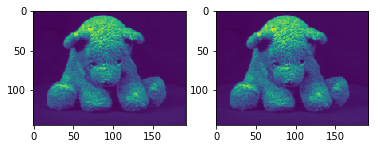

In [5]:
# show the raw image to check
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(data[0,:].reshape(nx,ny))
ax = fig.add_subplot(1,2,2)
plt.imshow(data2[nfiles2-1,:].reshape(nx,ny))
plt.show()

In [6]:
# isomap on 'clean' data
iso = Isomap(n_neighbors = 6, n_components = 3)
Ziso = iso.fit(data)
Isomap(eigen_solver = 'auto', max_iter = None, n_neighbors = 6, n_components = 3, 
       neighbors_algorithm = 'auto', path_method = 'auto', tol = 0)
Z = iso.transform(data)

In [7]:
# isomap on data with noise
iso = Isomap(n_neighbors = 6, n_components = 3)
Ziso2 = iso.fit(data2)
Isomap(eigen_solver = 'auto', max_iter = None, n_neighbors = 6, n_components = 3, 
       neighbors_algorithm = 'auto', path_method = 'auto', tol = 0)
Z2 = iso.transform(data2)

In [8]:
def Plot2D(X, Y, Nsamples, Nimage, NpxX, NpxY, a, b, colors):
    xrange = (max(Y[:,a]) - min(Y[:,a])) * .15
    yrange = (max(Y[:,b]) - min(Y[:,b])) * .15
    # 2D scatter plot after transformation
    # with some images printed on associated samples
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # scatter plot
    ax.scatter(Y[:,a], Y[:,b], marker = '.', c = colors)
    plt.axis([min(Y[:,a])*1.1, max(Y[:,a])*1.1, min(Y[:,b])*1.1, max(Y[:,b])*1.1])
    for i in range(Nsamples):
        img = int(random.random()*Nimage)
        # the location of the image
        x0 = Y[img,a] - xrange/2.0
        y0 = Y[img,b] - yrange/2.0
        x1 = Y[img,a] + xrange/2.0
        y1 = Y[img,b] + yrange/2.0
        # plot the images
        img0 = X[img,:].reshape(NpxX, NpxY)
        ax.imshow(img0, cmap = plt.cm.gray, extent = (x0, x1, y0, y1), aspect = 'auto')
    plt.show()

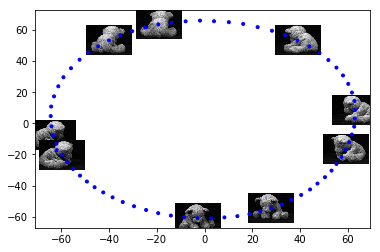

In [9]:
Nsamples = 10
Plot2D(data, Z, Nsamples, nfiles, nx, ny, 0, 1, labels1)

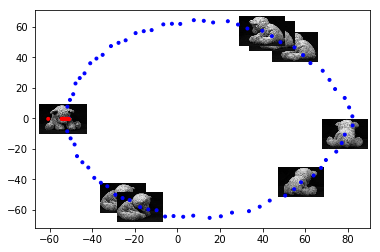

In [10]:
Nsamples = 10
Plot2D(data2, Z2, Nsamples, nfiles2, nx, ny, 0, 1, labels2)

In [11]:
def Plot3D(X, Y, Nsamples, Nimage, NpxX, NpxY, colors):
    xrange = (max(Y[:,0]) - min(Y[:,0])) * .15
    yrange = (max(Y[:,1]) - min(Y[:,1])) * .15
    # 3D scatter plot after transformation
    # with some images printed on associated samples
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection = '3d')
    # scatter plot
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], marker = '.', c = colors)
    ax.set_xlim3d(min(Y[:,0])*1.05, max(Y[:,0])*1.05)
    ax.set_ylim3d(min(Y[:,1])*1.05, max(Y[:,1])*1.05)
    ax.set_zlim3d(min(Y[:,2])*1.05, max(Y[:,2])*1.05)
    for i in range(Nsamples):
        img = int(random.random()*Nimage)
        # the location of the image
        x0 = Y[img,0] - xrange/2.0
        y0 = Y[img,1] - yrange/2.0
        x1 = Y[img,0] + xrange/2.0
        y1 = Y[img,1] + yrange/2.0
        # plot the images
        xx, yy = np.meshgrid(np.linspace(x0,x1,NpxY), np.linspace(y0,y1,NpxX))
        img0 = np.rot90(X[img,:].reshape(NpxX, NpxY), 2)
        ax.contourf(xx, yy, img0, cmap = plt.cm.gray)
    plt.show()

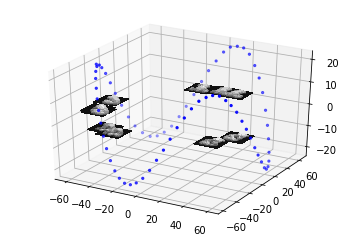

In [12]:
Nsamples = 10
Plot3D(data, Z, Nsamples, nfiles, nx, ny, labels1)

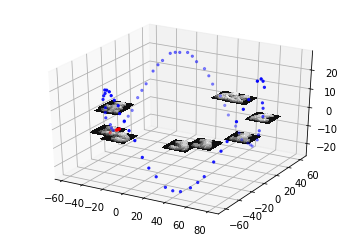

In [13]:
Nsamples = 10
Plot3D(data2, Z2, Nsamples, nfiles2, nx, ny, labels2)